In [1]:
!pip install pandas-datareader


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data 

In [3]:
start = '2000-01-01'
end = '2020-12-31'

df=data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1999-12-31,0.918527,0.888393,0.901228,0.917969,163811200.0,0.788183
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.858137
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.785788
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.797286
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.728290


In [4]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.352844
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.050781
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.239273
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,133.094666
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,132.069473


In [5]:
df=df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1999-12-31,0.918527,0.888393,0.901228,0.917969,163811200.0,0.788183
1,2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.858137
2,2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.785788
3,2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.797286
4,2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.728290


In [6]:
df=df.drop(['Date','Adj Close' ] ,axis=1)
df.head()

,High,Low,Open,Close,Volume
0,0.918527,0.888393,0.901228,0.917969,163811200.0
1,1.004464,0.907924,0.936384,0.999442,535796800.0
2,0.987723,0.903460,0.966518,0.915179,512377600.0
3,0.987165,0.919643,0.926339,0.928571,778321600.0
4,0.955357,0.848214,0.947545,0.848214,767972800.0


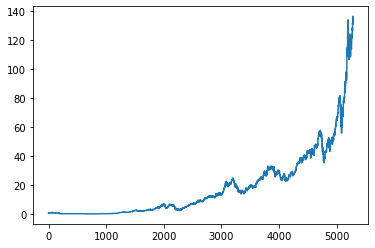

In [7]:
plt.plot(df.Close)

In [8]:
df

,High,Low,Open,Close,Volume
0,0.918527,0.888393,0.901228,0.917969,163811200.0
1,1.004464,0.907924,0.936384,0.999442,535796800.0
2,0.987723,0.903460,0.966518,0.915179,512377600.0
3,0.987165,0.919643,0.926339,0.928571,778321600.0
4,0.955357,0.848214,0.947545,0.848214,767972800.0
...,...,...,...,...,...
5280,133.460007,131.100006,131.320007,131.970001,54930100.0
5281,137.339996,133.509995,133.990005,136.690002,124486200.0
5282,138.789993,134.339996,138.050003,134.869995,121047300.0
5283,135.990005,133.399994,135.580002,133.720001,96452100.0


In [9]:
ma100=df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
5280    118.223525
5281    118.489800
5282    118.699475
5283    118.925550
5284    119.125175
Name: Close, Length: 5285, dtype: float64

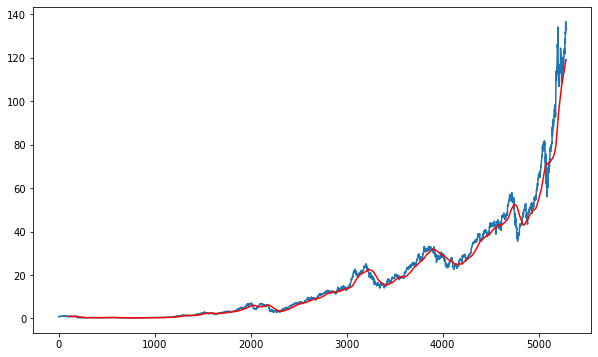

In [10]:
plt.figure(figsize=(10,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200=df.Close.rolling(200).mean()
ma200


0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
5280     99.158737
5281     99.494725
5282     99.866312
5283    100.218837
5284    100.573950
Name: Close, Length: 5285, dtype: float64

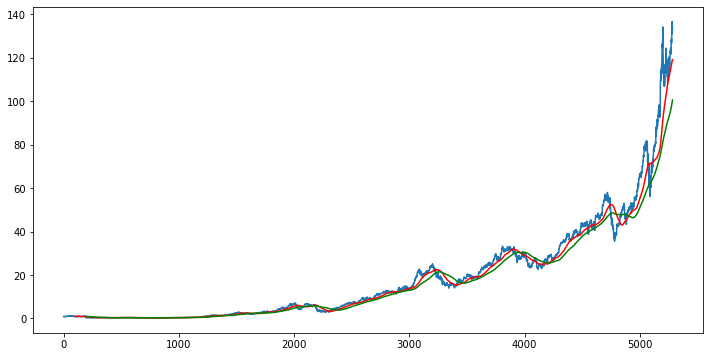

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
df.shape

(5285, 5)

In [14]:
#slpiting training and testing
data_train=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_test=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_train.shape)
print(data_test.shape)

(3699, 1)
(1586, 1)


In [15]:
data_train.head()

,Close
0,0.917969
1,0.999442
2,0.915179
3,0.928571
4,0.848214


In [16]:
data_test.head()

,Close
3699,25.215000
3700,25.395000
3701,25.447500
3702,25.240000
3703,25.264999


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [18]:
data_train_array=scaler.fit_transform(data_train)
data_train_array

array([[0.02671606],
       [0.02989975],
       [0.02660703],
       ...,
       [0.98173163],
       [0.98397857],
       [0.98368543]])

In [19]:
data_train_array.shape


(3699, 1)

In [20]:
x_train=[]
y_train=[]

for i in range(100, data_train_array.shape[0]):
    x_train.append(data_train_array[i-100:i])
    y_train.append(data_train_array[i,0])
    
x_train

[array([[0.02671606],
        [0.02989975],
        [0.02660703],
        [0.02713035],
        [0.02399026],
        [0.02556033],
        [0.02494975],
        [0.02320525],
        [0.02126451],
        [0.02460084],
        [0.0258874 ],
        [0.02710854],
        [0.02802442],
        [0.03044491],
        [0.0296817 ],
        [0.0279154 ],
        [0.03000877],
        [0.02928918],
        [0.02922376],
        [0.02630173],
        [0.02704313],
        [0.02582198],
        [0.02532043],
        [0.0268905 ],
        [0.02852597],
        [0.03064115],
        [0.03092466],
        [0.0301396 ],
        [0.03044491],
        [0.02878763],
        [0.03125172],
        [0.03236385],
        [0.03066296],
        [0.03092466],
        [0.0296599 ],
        [0.03055393],
        [0.03140436],
        [0.03103911],
        [0.02935459],
        [0.03035769],
        [0.03083743],
        [0.03631075],
        [0.03341055],
        [0.03550393],
        [0.03469712],
        [0

In [21]:
y_train

[0.021438947917917478,
 0.021291745560186627,
 0.020981008836300746,
 0.021395339219439716,
 0.02015238766559372,
 0.021940498027163198,
 0.0231398385533802,
 0.02270370265642673,
 0.02324886146415022,
 0.024535421716473972,
 0.023924848696458223,
 0.024251961682641668,
 0.02266009395794897,
 0.0238158257856882,
 0.02239843710877993,
 0.02307442434108794,
 0.02266009395794897,
 0.02455722723028847,
 0.026170898139644433,
 0.029659899136676632,
 0.02835149377496747,
 0.026912299584244702,
 0.028613190219707423,
 0.026955910611873697,
 0.0288312383703987,
 0.026607034036597893,
 0.027392044179675924,
 0.02804622822732067,
 0.02686869088576694,
 0.02699951931035146,
 0.0288312383703987,
 0.03070656845807493,
 0.03057574003349041,
 0.03192771449810643,
 0.03027047215669238,
 0.031099090998248174,
 0.03153522922435287,
 0.03079378585503046,
 0.0276100923303672,
 0.029310982965829922,
 0.02822066535038295,
 0.02481892367502842,
 0.02577837327031996,
 0.02577837327031996,
 0.02713034773493598

In [22]:
x_train=np.array(x_train)

In [23]:
y_train=np.array(y_train)

In [24]:
x_train

array([[[0.02671606],
        [0.02989975],
        [0.02660703],
        ...,
        [0.02364139],
        [0.02222396],
        [0.02078477]],

       [[0.02989975],
        [0.02660703],
        [0.02713035],
        ...,
        [0.02222396],
        [0.02078477],
        [0.02143895]],

       [[0.02660703],
        [0.02713035],
        [0.02399026],
        ...,
        [0.02078477],
        [0.02143895],
        [0.02129175]],

       ...,

       [[0.73214336],
        [0.73288302],
        [0.72318362],
        ...,
        [0.95174028],
        [0.94812567],
        [0.97753088]],

       [[0.73288302],
        [0.72318362],
        [0.78322213],
        ...,
        [0.94812567],
        [0.97753088],
        [0.98173163]],

       [[0.72318362],
        [0.78322213],
        [0.7890418 ],
        ...,
        [0.97753088],
        [0.98173163],
        [0.98397857]]])

In [25]:
x_train.shape

(3599, 100, 1)

In [26]:
x_train.size

359900

In [27]:
#ml model
      
!pip install keras

In [32]:
!pip install --upgrade pip

In [33]:
!pip install tensorflow

In [35]:
from keras.layers import Dense, Dropout, LSTM

In [37]:
from keras.models import Sequential

In [39]:
model=Sequential()
model.add(LSTM(units=50, activation='relu',return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu',return_sequences= True ))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu',return_sequences= True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units=1))
          

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 60)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 80)           45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100, 80)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

In [42]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train,epochs=50)

Epoch 1/50
113/113 [==============================] - 21s 149ms/step - loss: 0.0188
Epoch 2/50
113/113 [==============================] - 19s 171ms/step - loss: 0.0042
Epoch 3/50
113/113 [==============================] - 19s 170ms/step - loss: 0.0042
Epoch 4/50
113/113 [==============================] - 19s 170ms/step - loss: 0.0040
Epoch 5/50
113/113 [==============================] - 20s 173ms/step - loss: 0.0036
Epoch 6/50
113/113 [==============================] - 19s 171ms/step - loss: 0.0038
Epoch 7/50
113/113 [==============================] - 19s 171ms/step - loss: 0.0033
Epoch 8/50
113/113 [==============================] - 20s 177ms/step - loss: 0.0034
Epoch 9/50
113/113 [==============================] - 21s 185ms/step - loss: 0.0033
Epoch 10/50
113/113 [==============================] - 20s 178ms/step - loss: 0.0032
Epoch 11/50
113/113 [==============================] - 20s 178ms/step - loss: 0.0028
Epoch 12/50
113/113 [==============================] - 20s 172ms/step - lo

In [43]:
model.save('keras_model.h5')

In [44]:
data_test.head()

,Close
3699,25.215000
3700,25.395000
3701,25.447500
3702,25.240000
3703,25.264999


In [45]:
data_test.tail()

,Close
5280,131.970001
5281,136.690002
5282,134.869995
5283,133.720001
5284,132.690002


In [46]:
past_100_days=data_train.tail(100)

In [47]:
final_df=past_100_days.append(data_test, ignore_index=True)

In [48]:
final_df.head()

,Close
0,20.277500
1,20.426430
2,21.217501
3,21.154642
4,21.074642


In [49]:
input_data=scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.00127933],
       [0.00807474],
       ...,
       [0.98436588],
       [0.97448727],
       [0.96563943]])

In [51]:
input_data.shape

(1686, 1)

In [54]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [55]:
x_test,y_test= np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1586, 100, 1)
(1586,)


In [56]:
y_predicted=model.predict(x_test)

In [57]:
y_predicted.shape

(1586, 1)

In [58]:
y_test

array([0.04241383, 0.04396006, 0.04441104, ..., 0.98436588, 0.97448727,
       0.96563943])

In [59]:
y_predicted

array([[0.04016003],
       [0.04063231],
       [0.0410877 ],
       ...,
       [0.9189429 ],
       [0.92592084],
       [0.9327431 ]], dtype=float32)

In [60]:
scaler.scale_

array([0.00859014])

In [61]:
scaler_factor=1/0.00859014
y_predicted=y_predicted*scaler_factor
y_test=y_test*scaler_factor

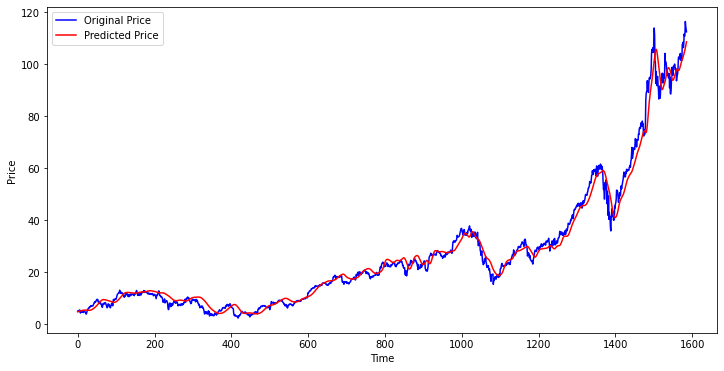

In [62]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()